In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision import models
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

import os 
os.chdir(r'C:\Users\USER\Desktop\데이터셋\resnet')

### batch16_lr0.001_epoch10

✅ 1차 분류: Vegetable (60.29%)
🍏 신선도: Fresh (76.62%)
🍎 종류: tomato (63.60%)


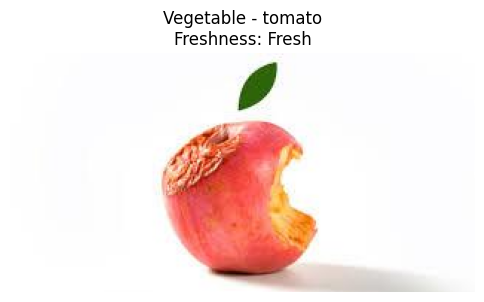

In [5]:
def load_model(model_path):
    model = torch.load(model_path, map_location=torch.device('cpu'), weights_only=False)
    model.eval()  
    return model


transform = transforms.Compose([
    #transforms.RandomResizedCrop(224),
    transforms.Resize(224),
    transforms.ToTensor()
])


model_paths = {
    "fruit_veg": "batch16_lr0.001_epoch10/fruit_veg.pth",  
    "fruit_f_r": "batch16_lr0.001_epoch10/f_f_r_batch16_lr0.001_epoch10.pth",     
    "veg_f_r": "batch16_lr0.001_epoch10/v_f_r_batch16_lr0.001_epoch10.pth",  
    "fruit_type": "batch16_lr0.001_epoch10/f_8class_batch16_lr0.001_epoch10.pth",       
    "vegetable_type": "batch16_lr0.001_epoch10/v_14class_batch16_lr0.001_epoch10.pth" 
}


first_model = load_model(model_paths["fruit_veg"])  
fruit_f_r_model = load_model(model_paths["fruit_f_r"]) 
veg_f_r_model = load_model(model_paths["veg_f_r"])  
fruit_type_model = load_model(model_paths["fruit_type"]) 
vegetable_type_model = load_model(model_paths["vegetable_type"])


first_classes = ["Fruit", "Vegetable"]
fresh_classes = ["Fresh", "Rotten"]
fruit_classes = ['apple', 'banana', 'kiwi', 'mango', 'orange', 'pineapple', 'strawberry', 'watermelon']
vegetable_classes = ['Cabbage', 'Carrot', 'Cucumber', 'Eggplant', 'Garlic', 'Green onion', 'Herb', 
                     'Lettuce', 'Onion', 'Pepper', 'Perilla', 'Potato', 'Radish', 'tomato']


def predict(model, image_tensor, class_names):
    with torch.no_grad():
        outputs = model(image_tensor)
        probabilities = torch.nn.functional.softmax(outputs[0], dim=0)
        max_idx = torch.argmax(probabilities).item()
        return class_names[max_idx], probabilities[max_idx].item() * 100


image_path = "C:/Users/USER/Desktop/rotten_apple.jpg"
image = Image.open(image_path)

if image.mode != 'RGB':
    image = image.convert("RGB")

image_tensor = transform(image).unsqueeze(0)  



# 1. Fruit-Veg 분류
first_prediction, first_confidence = predict(first_model, image_tensor, first_classes)
print(f"✅ 1차 분류: {first_prediction} ({first_confidence:.2f}%)")


# 2. Fresh-Rotten 분류
if first_prediction == "Fruit":
    freshness_prediction, freshness_confidence = predict(fruit_f_r_model, image_tensor, fresh_classes)
elif first_prediction == "Vegetable":
    freshness_prediction, freshness_confidence = predict(veg_f_r_model, image_tensor, fresh_classes)

print(f"🍏 신선도: {freshness_prediction} ({freshness_confidence:.2f}%)")

# 3. class 분류
if first_prediction == "Fruit":
    type_prediction, type_confidence = predict(fruit_type_model, image_tensor, fruit_classes)
elif first_prediction == "Vegetable":
    type_prediction, type_confidence = predict(vegetable_type_model, image_tensor, vegetable_classes)

print(f"🍎 종류: {type_prediction} ({type_confidence:.2f}%)")



plt.figure(figsize=(6, 6))
plt.imshow(np.array(image))
plt.axis("off")
plt.title(f"{first_prediction} - {type_prediction}\nFreshness: {freshness_prediction}")
plt.show()


#### batch size: 64

✅ 1차 분류: Vegetable (96.20%)
🍏 신선도: Fresh (51.99%)
🍎 종류: tomato (20.38%)


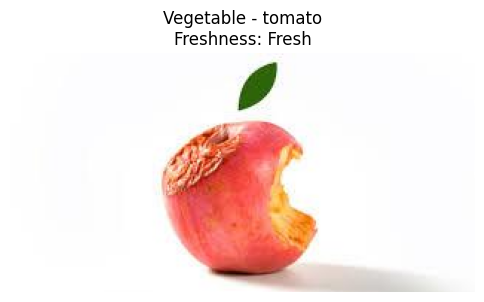

In [3]:
def load_model(model_path):
    model = torch.load(model_path, map_location=torch.device('cpu'), weights_only=False)
    model.eval()  
    return model


transform = transforms.Compose([
    #transforms.RandomResizedCrop(224),
    transforms.Resize(224),
    transforms.ToTensor()
])


model_paths = {
    "fruit_veg": "fruit_veg_batch64_lr0.001_epoch20.pth",  
    "fruit_f_r": "f_f_r_batch64_lr0.001_epoch15.pth",     
    "veg_f_r": "v_f_r_batch64_lr0.001_epoch15.pth",  
    "fruit_type": "f_8class_batch64_lr0.001_epoch15.pth",       
    "vegetable_type": "v_14class_batch64_lr0.001_epoch10.pth" 
}


first_model = load_model(model_paths["fruit_veg"])  
fruit_f_r_model = load_model(model_paths["fruit_f_r"]) 
veg_f_r_model = load_model(model_paths["veg_f_r"])  
fruit_type_model = load_model(model_paths["fruit_type"]) 
vegetable_type_model = load_model(model_paths["vegetable_type"])


first_classes = ["Fruit", "Vegetable"]
fresh_classes = ["Fresh", "Rotten"]
fruit_classes = ['apple', 'banana', 'kiwi', 'mango', 'orange', 'pineapple', 'strawberry', 'watermelon']
vegetable_classes = ['Cabbage', 'Carrot', 'Cucumber', 'Eggplant', 'Garlic', 'Green onion', 'Herb', 
                     'Lettuce', 'Onion', 'Pepper', 'Perilla', 'Potato', 'Radish', 'tomato']


def predict(model, image_tensor, class_names):
    with torch.no_grad():
        outputs = model(image_tensor)
        probabilities = torch.nn.functional.softmax(outputs[0], dim=0)
        max_idx = torch.argmax(probabilities).item()
        return class_names[max_idx], probabilities[max_idx].item() * 100


image_path = "C:/Users/USER/Desktop/rotten_apple.jpg"
image = Image.open(image_path)

if image.mode != 'RGB':
    image = image.convert("RGB")

image_tensor = transform(image).unsqueeze(0)  



# 1. Fruit-Veg 분류
first_prediction, first_confidence = predict(first_model, image_tensor, first_classes)
print(f"✅ 1차 분류: {first_prediction} ({first_confidence:.2f}%)")


# 2. Fresh-Rotten 분류
if first_prediction == "Fruit":
    freshness_prediction, freshness_confidence = predict(fruit_f_r_model, image_tensor, fresh_classes)
elif first_prediction == "Vegetable":
    freshness_prediction, freshness_confidence = predict(veg_f_r_model, image_tensor, fresh_classes)

print(f"🍏 신선도: {freshness_prediction} ({freshness_confidence:.2f}%)")

# 3. class 분류
if first_prediction == "Fruit":
    type_prediction, type_confidence = predict(fruit_type_model, image_tensor, fruit_classes)
elif first_prediction == "Vegetable":
    type_prediction, type_confidence = predict(vegetable_type_model, image_tensor, vegetable_classes)

print(f"🍎 종류: {type_prediction} ({type_confidence:.2f}%)")



plt.figure(figsize=(6, 6))
plt.imshow(np.array(image))
plt.axis("off")
plt.title(f"{first_prediction} - {type_prediction}\nFreshness: {freshness_prediction}")
plt.show()


### normalize 한거 

✅ 1차 분류: Vegetable (96.20%)
🍏 신선도: Fresh (91.95%)
🍎 종류: Onion (31.53%)


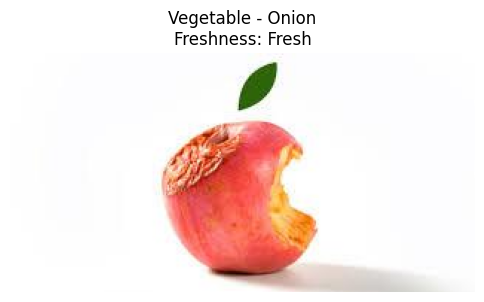

In [8]:
def load_model(model_path):
    model = torch.load(model_path, map_location=torch.device('cpu'), weights_only=False)
    model.eval()  
    return model


t_transforms = transforms.Compose([
    #transforms.RandomResizedCrop(224),
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
])

model_paths = {
    "fruit_veg": "fruit_veg_batch64_lr0.001_epoch20.pth",  
    "fruit_f_r": "f_f_r_batch64_lr0.001_epoch10_normalize.pth",     
    "veg_f_r": "v_f_r_batch64_lr0.001_epoch10_normalize.pth",  
    "fruit_type": "f_8class_batch64_lr0.001_epoch10_normalize.pth",       
    "vegetable_type": "v_14class_batch64_lr0.001_epoch10_normalize.pth" 
}


first_model = load_model(model_paths["fruit_veg"])  
fruit_f_r_model = load_model(model_paths["fruit_f_r"]) 
veg_f_r_model = load_model(model_paths["veg_f_r"])  
fruit_type_model = load_model(model_paths["fruit_type"]) 
vegetable_type_model = load_model(model_paths["vegetable_type"])


first_classes = ["Fruit", "Vegetable"]
fresh_classes = ["Fresh", "Rotten"]
fruit_classes = ['apple', 'banana', 'kiwi', 'mango', 'orange', 'pineapple', 'strawberry', 'watermelon']
vegetable_classes = ['Cabbage', 'Carrot', 'Cucumber', 'Eggplant', 'Garlic', 'Green onion', 'Herb', 
                     'Lettuce', 'Onion', 'Pepper', 'Perilla', 'Potato', 'Radish', 'tomato']


def predict(model, image_tensor, class_names):
    with torch.no_grad():
        outputs = model(image_tensor)
        probabilities = torch.nn.functional.softmax(outputs[0], dim=0)
        max_idx = torch.argmax(probabilities).item()
        return class_names[max_idx], probabilities[max_idx].item() * 100


image_path = "C:/Users/USER/Desktop/rotten_apple.jpg"
image = Image.open(image_path)

if image.mode != 'RGB':
    image = image.convert("RGB")

image_tensor = transform(image).unsqueeze(0)  



# 1. Fruit-Veg 분류
first_prediction, first_confidence = predict(first_model, image_tensor, first_classes)
print(f"✅ 1차 분류: {first_prediction} ({first_confidence:.2f}%)")


# 2. Fresh-Rotten 분류
if first_prediction == "Fruit":
    freshness_prediction, freshness_confidence = predict(fruit_f_r_model, image_tensor, fresh_classes)
elif first_prediction == "Vegetable":
    freshness_prediction, freshness_confidence = predict(veg_f_r_model, image_tensor, fresh_classes)

print(f"🍏 신선도: {freshness_prediction} ({freshness_confidence:.2f}%)")

# 3. class 분류
if first_prediction == "Fruit":
    type_prediction, type_confidence = predict(fruit_type_model, image_tensor, fruit_classes)
elif first_prediction == "Vegetable":
    type_prediction, type_confidence = predict(vegetable_type_model, image_tensor, vegetable_classes)

print(f"🍎 종류: {type_prediction} ({type_confidence:.2f}%)")



plt.figure(figsize=(6, 6))
plt.imshow(np.array(image))
plt.axis("off")
plt.title(f"{first_prediction} - {type_prediction}\nFreshness: {freshness_prediction}")
plt.show()


# normalize 안한거 

✅ 1차 분류: Vegetable (96.20%)
🍏 신선도: Fresh (51.99%)
🍎 종류: tomato (20.38%)


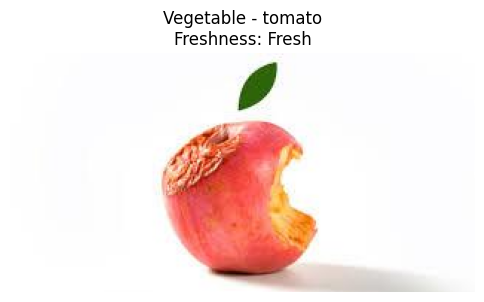

In [9]:
def load_model(model_path):
    model = torch.load(model_path, map_location=torch.device('cpu'), weights_only=False)
    model.eval()  
    return model


t_transforms = transforms.Compose([
    #transforms.RandomResizedCrop(224),
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
])

model_paths = {
    "fruit_veg": "fruit_veg_batch64_lr0.001_epoch20.pth",  
    "fruit_f_r": "f_f_r_batch64_lr0.001_epoch15.pth",     
    "veg_f_r": "v_f_r_batch64_lr0.001_epoch15.pth",  
    "fruit_type": "f_8class_batch64_lr0.001_epoch15.pth",       
    "vegetable_type": "v_14class_batch64_lr0.001_epoch10.pth" 
}


first_model = load_model(model_paths["fruit_veg"])  
fruit_f_r_model = load_model(model_paths["fruit_f_r"]) 
veg_f_r_model = load_model(model_paths["veg_f_r"])  
fruit_type_model = load_model(model_paths["fruit_type"]) 
vegetable_type_model = load_model(model_paths["vegetable_type"])


first_classes = ["Fruit", "Vegetable"]
fresh_classes = ["Fresh", "Rotten"]
fruit_classes = ['apple', 'banana', 'kiwi', 'mango', 'orange', 'pineapple', 'strawberry', 'watermelon']
vegetable_classes = ['Cabbage', 'Carrot', 'Cucumber', 'Eggplant', 'Garlic', 'Green onion', 'Herb', 
                     'Lettuce', 'Onion', 'Pepper', 'Perilla', 'Potato', 'Radish', 'tomato']


def predict(model, image_tensor, class_names):
    with torch.no_grad():
        outputs = model(image_tensor)
        probabilities = torch.nn.functional.softmax(outputs[0], dim=0)
        max_idx = torch.argmax(probabilities).item()
        return class_names[max_idx], probabilities[max_idx].item() * 100


image_path = "C:/Users/USER/Desktop/rotten_apple.jpg"
image = Image.open(image_path)

if image.mode != 'RGB':
    image = image.convert("RGB")

image_tensor = transform(image).unsqueeze(0)  



# 1. Fruit-Veg 분류
first_prediction, first_confidence = predict(first_model, image_tensor, first_classes)
print(f"✅ 1차 분류: {first_prediction} ({first_confidence:.2f}%)")


# 2. Fresh-Rotten 분류
if first_prediction == "Fruit":
    freshness_prediction, freshness_confidence = predict(fruit_f_r_model, image_tensor, fresh_classes)
elif first_prediction == "Vegetable":
    freshness_prediction, freshness_confidence = predict(veg_f_r_model, image_tensor, fresh_classes)

print(f"🍏 신선도: {freshness_prediction} ({freshness_confidence:.2f}%)")

# 3. class 분류
if first_prediction == "Fruit":
    type_prediction, type_confidence = predict(fruit_type_model, image_tensor, fruit_classes)
elif first_prediction == "Vegetable":
    type_prediction, type_confidence = predict(vegetable_type_model, image_tensor, vegetable_classes)

print(f"🍎 종류: {type_prediction} ({type_confidence:.2f}%)")



plt.figure(figsize=(6, 6))
plt.imshow(np.array(image))
plt.axis("off")
plt.title(f"{first_prediction} - {type_prediction}\nFreshness: {freshness_prediction}")
plt.show()
